PART 2. 신경망과 딥러닝

10장. 케라스를 사용한 인공 신경망 소개
- 인공신경망(ANN, Artificial Neural Network): 뇌에 있는 생물학적 뉴런(신경 세포)의 네트워크에서 영감을 받은 머신러닝 모델. 인공 신경망은 뉴런에서 아이디어를 얻었을 뿐 생물학적 뉴런과는 멀어지고 있음. 데이터에서 패턴을 점진적으로 학습하는 수학 모델에 가까움
- 인공신경망은 딥러닝의 핵심. 이미지 분류, 음성인식, 추천 시스템, 강화학습 등 머신러닝 문제를 다루는데 적합함
- 인공 신경망의 초창기 구조 -> 다층 퍼셉트론 -> 케라스 API 사용하여 인공 신경망 구현

## 10.1 생물학적 뉴런에서 인공 뉴런까지
- 인공 신경망의 역사는 꽤 긴편. 과거 SVM등 머신러닝 기술들이 인공 신경망보다 더 나은 결과를 보여 침체기를 보였으나 현재는 인공 신경망의 새로운 부흥기
    - 신경망 훈련을 위한 데이터 증대. 인공 신경망은 규모가 크고 복잡한 문제에서 다른 머신러닝보다 좋은 성능을 냄
    - 컴퓨터 하드웨어의 발전. 신경망 훈련 학습 시간 감소. 클라우드 플랫폼 발전
    - 훈련 알고리즘 향상
    - 인공 신경망의 이론상 제한이 실전에서는 문제가 되지 않음. 예: 지역 최저점에 갇혀 인공 신경망 훈련 알고리즘이 해결책을 찾지 못할 것으로 생각했으나 실제는 굉장히 드문일(지역 최저점에 도덜하더라도 일반적으론 전역 최적점에 매우 가까움)
    - 투자와 진보의 선순환

> ### 10.1.1 생물학적 뉴런(BNN, Biological Neural Network)
- 구조: 수상돌기, 축삭돌기, 시냅스(말단), 활동 전위(AP, Action potential) 또는 신호, 신경 전달물질
- 뉴런은 다른 수많은 뉴런 네트워크와 연결. 복잡한 계산 수행 가능

> ### 10.1.2 뉴런을 사용한 논리 연산
- 생물학적 뉴런에서 착안한 단순한 신경망 모델. 나중에 인공 뉴런이 됨
    - 이진 입력, 이진 출력 하나를 가짐. 단순히 입력이 일정 개수만큼 활성화 되었을때 출력을 내보낸다 가정한 모델
- 이런 간단한 모델로 인공뉴런의 네트워크를 만들어 어떤 논리 명제도 계산할 수 있다는 것을 증명함

> ### 10.1.3 퍼셉트론(Perceptron)
- 가장 간단한 인공 신경망 구조 중 하나
- TLU(Threshold Logic Unit) 또는 LTU(Linear Threshold Unit)이라 불리는 조금 다른 형태의 인공 뉴런을 기반
    - 입력과 출력이 on/off 개념의 이진값이 아닌 어떤 숫자이며, 각각의 입력 연결은 가중치와 연관되어 있음
    - 입력에 가중치를 반영한 합을 계산한 후, 그 합에 계단 함수(Step function)를 적용하여 결과 출력
    - 계단 함수: 임계 값을 기준으로 binary 값을 출력하는 함수. 일반적으로 헤비사이드 계산 함수를 사용\
    부호 함수(임계 값에도 출력값을 부여하여 출력 값이 3가지)를 대신 사용하기도 함
- 하나의 TLU는 간단한 선형 이진 분류 문제에 사용 가능. TLU를 훈련한다는 것은 최적의 가중치를 찾는 것

- 퍼셉트론은 층이 하나뿐인 TLU로 구성됨. 각 TLU는 모든 입력에 연결되어 있음
- 완전 연결층 = 밀집층: 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 경우
- 퍼셉트론의 입력은 입력 뉴런이라고 불리는 특별한 통과 뉴런에 주입됨. 어떤 입력이 주입되든 출력으로 통과시킴. 입력층은 모두 입력 뉴런으로 구성. 거기에 편향 이라는 특성이 더해짐. 편향 특성은 항상 1을 출력하는 특별한 종류의 뉴런인 편향 뉴런(bias neuron)으로 표현됨
- sklearn.linear_model은 하나의 TLU 네트워크를 구현한 Perceptron 클래스를 제공
  - Perceptron 클래스: 매개변수 loss='perceptron', learning_rate='constant', eta0=1(학습률), penalty=None(규제없음)인 SGDClassifier와 같음
  - 로지스틱회귀와는 달리 퍼셉트론은 클래스 확률을 제공하지 않음. 고정된 임계값을 기준으로 예측을 만듦(로지스틱 회귀가 더 선호됨)
- 퍼셉트론의 약점: XOR(배타적 논리합)분류문제 등은 풀지 못함. 이는 다른 선형 분류모델도 마찬가지
- 다층 퍼셉트론(MLP): 퍼셉트론을 여러개 쌓아올린 형태로 XOR 문제를 풀 수 있음

In [90]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)
per_clf.predict([[2, 0.5]])

array([0])

> ### 10.1.4 다층 퍼셉트론(MLP)과 역전파(Backpropagation)
- 다층 퍼셉트론: 입력층, 은닉층(TLU층으로 하나 이상), 출력층으로 구성
  - 입력에 가까운 층: 하위층, 출력에 가까운 층: 상위층
  - 출력층을 제외하면 모든 층은 편향 뉴런을 포함. 다음 층과 완전 연결되어 있음
  - FNN(Feedforward Neural Network): 신호가 입력 -> 출력의 한 방향으로만 흐르는 구조
- DNN(Deep Neural Network): 은닉층을 여러개 쌓아올린 인공 신경망
- 역전파(Backpropagation): 다층 퍼셉트론을 훈련하는 알고리즘. 그래디언트를 자동으로 계산하는 경사 하강법. 네트워크를 두번(정방향, 역방향) 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크의 오차의 그래디언트를 계산할 수 있음. 오차를 감소시키기 위해 각 연결 가중치와 편향값이 어떻게 바뀌어야 할지 알 수 있음
  1. 정방향 계산: 각 훈련 샘플에 대해 역전파 알고리즘이 먼저 예측을 만들고 각 층의 오차를 측정함(손실함수 사용)
  2. 역방향 계산: 역방향으로 각 층을 거치며 각 층의 출력 연결이 오차에 기여하는 정도를 측정
  3. 경사 하강법: 경사 하강법을 수행하여 이 오차가 감소하도록 가중치를 조정
- 활성화 함수의 변화: 역전파 알고리즘을 잘 작동시키기 위해 계단 함수를 시그모이드, tanh, Relu로 변화
  - 시그모이드 함수: -1, 0 범위의 S자 모양의 함수
  - tanh(하이퍼볼릭 탄젠트)함수: -1, 1 범위의 S자 모양의 함수
  - Relu 함수: max(0,x): 계산 속도가 빠르다는 장점. 출력에 최대값이 없으므로 시그모이드 함수, tanh 함수에서 발생하는 경사 하강법의 일부 문제를 완화해줌
- 활성화 함수를 사용하는 이유: 선형 변환을 여러 개 연결해도 얻을 수 있는것은 선형 변환뿐. 층 사이에 비선형성을 추가해야 함. 비선형 함수가 있는 충분히 큰 심층 신경망은 연속 함수에 근사 할 수 있음

> ### 10.1.5 회귀를 위한 다층 퍼셉트론
- 회귀의 경우 출력 뉴런이 하나만 필요함
    - 다변량 회귀(동시에 여러 값을 예측하는 경우)의 경우 출력 차원마다 출력 뉴런이 하나씩 필요(예: 바운딩 박스, 좌표 2개, 너비 1개, 높이 1개. 총 출력 뉴런 4개 필요)
- 출력 뉴런의 활성화 함수: 출력 값의 범위에 따라 사용하기도, 사용하지 않기도 함
    - 활성화 함수: ReLU, softplus, sigmoid, tanh 등
- 손실 함수: MSE,  MAE(Train set에 이상치가 많은 경우), Huber(MSE, MAE 조합)
- 회귀 MLP의 구조 예시
    - 입력 뉴런 수: 특성마다 하나씩
    - 은닉층 수: 문제에 따라 다름. 1~5 사이
    - 은닉층의 뉴런수: 문제에 따라 다름. 10~100 사이
    - 은닉층의 활성화 함수: ReLU(또는 SELU)
    - 출력 뉴런 수: 예측 차원마다 하나
    - 출력층의 활성화 함수: 없거나 출력값의 범위에 따라 다르게 사용
        - 출력이 양수일떄: ReLU, softplus
        - 출력을 특정 범위로 제한시: sigmoid, tanh
    - 손실함수: MSE, MAE/Huber(이상치가 있을시)

> ### 10.1.6 분류를 위한 다층 퍼셉트론
- MLP의 출력값은 해당 클래스에 대한 예측 확률값
    - 이진분류, 다중레이블 이진분류: 양성 클래스에 대한 예측 확률
    - 다중분류: 해당 클래스에 대한 예측 확률(모든 클래스의 예측합은 1)

- 분류 MLP의 구조 예시
    - 입력층과 은닉층: 회귀와 동일
    - 출력 뉴런 수: 1개(이진분류), 레이블마다 1개(다중레이블 이진분류), 클래스마다 1개(다중분류)
    - 출력층의 활성화 함수: sigmoid(이진분류, 다중레이블 이진분류), softmax(다중분류)
    - 손실함수: cross-entropy loss(=log loss)

## 10.2 케라스로 다층 퍼셉트론 구현하기

### 10.2.1 텐서플로 2 설치

In [91]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(tf.keras.__version__)

2.7.0
2.7.0


### 10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기
- fashion_mnist 데이터셋\
10개의 클래스로 이루어진 28X28 픽셀의 흑백 이미지 7만개\
MNIST와 형태가 같으나 손글씨 숫자가 아닌 패션 아이템 이미지\
클래스마다 샘플이 더 다양하며 MNIST보다 더 어려운 문제

케라스를 사용하여 데이터셋 적재하기

In [92]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [93]:
# X값 파악
print(X_train_full.shape)
print(X_train_full.dtype)
print(X_train_full.min(), X_train_full.max())

(60000, 28, 28)
uint8
0 255


In [94]:
# X, y train, val, test 나누기 및 스케일 조정: [0, 1]의 float 형태로
# X의 스케일 조정하는 이유: 경사하강법으로 신경망을 훈련하기 때문
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
X_test = X_test/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [95]:
# y의 클래스 이름 지정
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names[y_train[0]]

'Coat'

시퀀셜 API를 사용하여 모델 만들기

In [96]:
# 두개의 은닉층으로 이루어진 다중분류용 다층퍼셉트론(MLP)

# 1. Sequential API: 순서대로 연결된 층을 일렬로 쌓아서 구성
model = keras.models.Sequential()

# 2. 1층(Flatten): 입력층. 입력 이미지를 1D 배열로 변환. 파라미터 없는 간단한 전처리 과정
# 모델의 첫 층이기에 input_shape 지정. 배치 사이즈를 제외한 샘플의 크기만 써야함
model.add(keras.layers.Flatten(input_shape=[28,28]))

# 3. 2층(Dense): 첫번째 Dense 은닉층. ReLU 사용. Dense층마다 가중치 행렬을 관리함
# 각 층의 뉴런과 입력 사이의 모든 연결 가중치가 포함되며, 편향또한 벡터로 관리함
model.add(keras.layers.Dense(300, activation='relu'))

# 4. 3층(Dense): 두번째 Dense 은닉층
model.add(keras.layers.Dense(100, activation='relu'))

# 5. 4층(Dense): 출력층. 뉴런 10개를 가진 Dense층을 추가
model.add(keras.layers.Dense(10, activation='softmax'))

In [97]:
# Sequential 모델을 만들 때, 위처럼 층을 하나씩 add하지 않고 리스트 형태로도 작성 가능
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [98]:
# 모델 요약
model.summary()

# layer: 각 층의 이름
# Output Shape: 출력크기. None: 배치 크기에 어떤 값도 가능하다는 의미
# Param #: 파라미터 갯수. 훈련되는 파라미터와 훈련되지 않은 파라미터를 모두 포함
# 1번째 은닉층의 파라미터 갯수: 784*300(연결 가중치) + 300(bias) = 235500
# 2번째 은닉층의 파라미터 갯수: 300*100(연결 가중치) + 100(bias) = 30100
# 출력층의 파라미터 갯수: 100*10(연결 가중치) + 10(bias) = 1010

### 파라미터수가 많고, 훈련 데이터가 많지 않을시 과대적합의 위험이 있음

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 300)               235500    
                                                                 
 dense_15 (Dense)            (None, 100)               30100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [99]:
# 모델의 층 정보: 이름, 가중치(연결 가중치, 편향)
print(model.layers)
print(model.layers[1].name)
weights, biases = model.layers[1].get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

# Dense층은 대칭성을 깨뜨리기 위해 연결 가중치를 무작위로 초기화 하고, 편향은 0으로 초기화 함
# 다른 초기화 방법을 사용하고 싶다면 층을 만들때 매개변수로 kernel_initializer, bias_initializer 설정 가능

[<keras.layers.core.flatten.Flatten object at 0x0000027B41825CD0>, <keras.layers.core.dense.Dense object at 0x0000027B41825A60>, <keras.layers.core.dense.Dense object at 0x0000027B418122E0>, <keras.layers.core.dense.Dense object at 0x0000027B41AE2250>]
dense_14
[[-4.36110049e-03  2.90213078e-02 -3.01976502e-02 ... -6.83602020e-02
  -8.32527876e-03 -6.98106736e-02]
 [ 4.14008945e-02 -5.29699698e-02 -6.02805875e-02 ...  6.65770322e-02
   3.39299589e-02  2.97228992e-02]
 [ 2.91691348e-02  3.25812995e-02 -3.19365449e-02 ...  1.40430927e-02
  -1.41826011e-02  5.96647412e-02]
 ...
 [ 2.53277421e-02  1.43776685e-02  2.51225308e-02 ... -7.10561424e-02
  -2.81205662e-02 -4.17584740e-02]
 [-3.16247307e-02  5.12631983e-02 -5.45949340e-02 ... -6.98876083e-02
  -7.87556916e-03 -5.64955994e-02]
 [ 2.12868080e-02  3.73050570e-05  2.24471092e-02 ... -1.65431201e-02
   1.92171708e-02  8.77465308e-03]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

모델 컴파일

In [100]:
# 모델 생성후 컴파일을 통해 손실함수, 옵티마이저 지정해야. 훈련 및 평가시 계산할 지표도 지정 가능
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics='acc')

# 1. 손실함수: 레이블이 정수 1개, 클래스가 배타적이므로 sparse_categorical_crossentropy
#              레이블이 샘플마다 클래스 별 타깃 확률을 가지고 있다면 categorical_crossentropy
#              이진분류(다중 레이블 이진분류)는 binary_crossentropy
# 2. 옵티마이저: sgd(Stochastic Gradient Descent: 확률적 경사하강법)
# 3. 평가지표: 분류기이므로 accuracy로 지정. 'accuracy', ['accuracy'] 등 가능

모델 훈련과 평가

In [101]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# model.fit()의 매개변수
# validation_split: train의 해당 비율만큼을 validation으로 사용 가능
# class_weight: 클래스에 따라 값의 편중이 되어 있는 경우 지정
#               적게 등장하는 클래스는 높은 가중치, 많이 등장하는 클래스는 낮은 가중치를 부여함
# sample_weight: 샘플별 가중치 부여

# train set: 에포크가 진행되는 동안 평균 loss, acc 계산, val set: 에포크가 끝난 후 평균 loss, acc 계산

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7253 - acc: 0.7597 - val_loss: 0.5247 - val_acc: 0.8282
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4910 - acc: 0.8297 - val_loss: 0.4636 - val_acc: 0.8438
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4436 - acc: 0.8449 - val_loss: 0.4260 - val_acc: 0.8562
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4163 - acc: 0.8545 - val_loss: 0.4368 - val_acc: 0.8376
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3953 - acc: 0.8611 - val_loss: 0.4095 - val_acc: 0.8554
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3794 - acc: 0.8662 - val_loss: 0.3780 - val_acc: 0.8702
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3659 - acc: 0.8703 - val_loss: 0.3628 - val_acc: 0.8710
Epoch 8/30
1719/1719 [==============================] - 3s 2ms

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
30


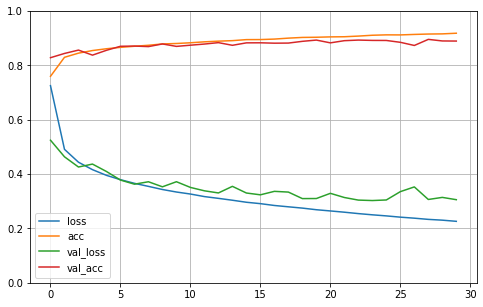

In [114]:
# history 이용하여 학습곡선(learning curve) 그리기
# history: history.history, history.params, history.epoch

import pandas as pd
import matplotlib.pyplot as plt

print(history.history.keys())
print(len(history.history['loss']))

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# 훈련 epoch이 증가함에 따라 train acc, val acc 증가, train loss, val loss 는 감소
# 검증곡선이 훈련곡선과 가까움 -> 과대적합 되지 않았음
# 훈련곡선은 에포크가 진행되는 동안 계산, 검증곡선은 에포크가 끝난 후에 계산
#   -> 훈련곡선은 에포크의 절반만큼 왼쪽으로 이동시켜 봐야 -> 훈련초기에 훈련곡선과 검증곡선이 거의 일치
# epoch이 증가함에 따라 loss가 계속 감소한다면 모델이 완전히 수렴되지 않은것. 훈련 계속해야함

# 모델 성능이 불만족스럽다면 하이퍼파라미터 튜닝 필요
#   -> 학습률, 옵티마이저, 층 갯수, 층의 뉴런 갯수, 은닉층의 활성화 함수, 배치사이즈 등

In [120]:
# test set으로 모델 평가
model.evaluate(X_test, y_test)

# 검증세트보다 테스트세트에서 성능이 조금 낮음(일반적)
# 하이퍼파라미터 튜닝은 검증세트에서 진행해야

313/313 [==============================] - 1s 1ms/step - loss: 0.3386 - acc: 0.8814


[0.33859431743621826, 0.8813999891281128]

모델을 사용해 예측을 만들기

In [122]:
X_new = X_test[:3]
model.predict(X_new).round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.89],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [137]:
class_names[model.predict(X_new).round(2)[0].argmax()]

'Ankle boot'

### 10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기
- 시퀀셜 API를 사용한 회귀용 MLP는 분류용 MLP 구축, 훈련, 평가, 예측 방법과 거의 동일
- 차이점: 출력층이 활성화 함수가 없는 하나의 뉴런을 가지며, 손실함수는 MSE 사용

In [138]:
from sklearn.datasets import fetch_california_housing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [144]:
mse_test

0.3673913776874542

In [179]:
# 데이터셋의 잡음이 많으므로, 과대적합을 막기 위해 뉴런수가 적은 은닉층 하나만 사용
# 출력층: 활성화 함수가 없는 하나의 뉴런

model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test= model.evaluate(X_test, y_test)
X_new = X_test[:3]
model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9377 - val_loss: 0.5245
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5114 - val_loss: 0.4364
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4513 - val_loss: 0.4115
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4296 - val_loss: 0.3923
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4166 - val_loss: 0.3863
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4068 - val_loss: 0.3767
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4025 - val_loss: 0.3736
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3961 - val_loss: 0.3678
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3906 - val_loss: 0.3713
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3858 - val_loss: 0.3606

array([[1.2779453],
       [2.8629484],
       [3.617066 ]], dtype=float32)

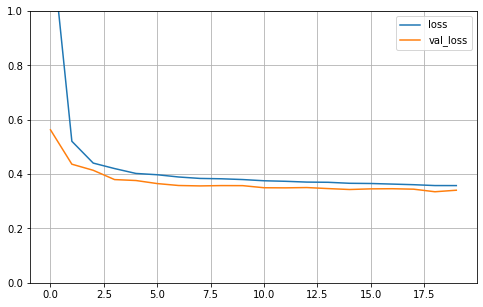

In [146]:
# learning curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### 10.2.4 함수형 API를 사용해 복잡한 모델 만들기
- 함수형 API: 순차적인 Sequential API와는 달리 입력과 출력이 여러개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들때 사용
- 입력이 여러개인 경우
    - 예) Wide & Deep 신경망
    - 입력의 일부 또는 전체가 출력층에 바로 연결되는 형태
    - 신경망이 복잡한 패턴(깊은층)과 간단한 패턴(짧은경로) 모두 학습 가능
    - 데이터에 있는 간단한 패턴이 연속된 변환으로 왜곡될 가능성을 줄임(MLP의 한계 극복)
- 출력이 여러개인 경우
    - 그림에 있는 주요 물체를 분류하고 위치를 알아내는 경우. 회귀(물체 중심의 좌표, 너비, 높이)+분류 동시에
    - 동일한 데이터에서 독립적인 여러 작업을 수행 예) 얼굴 사진으로 다중 작업 분류를 수행(표정, 안경여부)
    - 규제기법: 신경망 구조 안에 보조 출력을 추가. 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한 것을 학습하는지 확인
        - 규제: 과대적합 감소, 모델의 일반화 성능을 높이기 위해 훈련에 제약을 가함

In [174]:
# 함수형 API 모델
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_49 (Dense)               (None, 30)           270         ['input_5[0][0]']                
                                                                                                  
 dense_50 (Dense)               (None, 30)           930         ['dense_49[0][0]']               
                                                                                                  
 concatenate_8 (Concatenate)    (None, 38)           0           ['input_5[0][0]',                
                                                                  'dense_50[0][0]']         

In [175]:
# 여러개의 입력: 일부 입력은 짧은 경로, 그 외 입력은 깊은 경로로 전달
input_A = keras.layers.Input(shape=[5], name='wide_input') # 0~4 까지의 feature
input_B = keras.layers.Input(shape=[6], name='deep_input') # 2~7 까지의 feature
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_52 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_53 (Dense)               (None, 30)           930         ['dense_52[0][0]']               
                                                                                            

In [176]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.7970 - val_loss: 0.9045
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8512 - val_loss: 0.7377
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7442 - val_loss: 0.6654
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6863 - val_loss: 0.6192
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6459 - val_loss: 0.5847
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6144 - val_loss: 0.5574
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5892 - val_loss: 0.5343
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5678 - val_loss: 0.5181
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5498 - val_loss: 0.5039
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5352 - val_loss: 0.4909

array([[1.5221052],
       [2.7898154],
       [3.8417253]], dtype=float32)

In [157]:
# 여러개의 출력: 규제를 위해 보조 출력을 추가하는 경우
input_A = keras.layers.Input(shape=[5], name='wide_input') # 0~4 까지의 feature
input_B = keras.layers.Input(shape=[6], name='deep_input') # 2~7 까지의 feature
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_34 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_35 (Dense)               (None, 30)           930         ['dense_34[0][0]']               
                                                                                            

In [161]:
# 출력은 각각의 손실함수가 필요
# 출력에 따른 가중치 부여도 가능함
model.compile(loss=['mse','mse'], loss_weights=[0.9, 0.1], optimizer='sgd')
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))
model.evaluate([X_test_A, X_test_B], [y_test, y_test])
model.predict([X_new_A, X_new_B])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3412 - main_output_loss: 0.3300 - aux_output_loss: 0.4414 - val_loss: 0.3268 - val_main_output_loss: 0.3172 - val_aux_output_loss: 0.4129
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3386 - main_output_loss: 0.3274 - aux_output_loss: 0.4391 - val_loss: 0.3293 - val_main_output_loss: 0.3198 - val_aux_output_loss: 0.4150
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3364 - main_output_loss: 0.3255 - aux_output_loss: 0.4348 - val_loss: 0.3215 - val_main_output_loss: 0.3119 - val_aux_output_loss: 0.4081
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3350 - main_output_loss: 0.3243 - aux_output_loss: 0.4320 - val_loss: 0.3208 - val_main_output_loss: 0.3112 - val_aux_output_loss: 0.4079
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3369 - main_output_loss: 0.3264 - aux_output_loss: 0.4310 - val_loss

[array([[1.377639 ],
        [2.7681932],
        [3.800742 ]], dtype=float32),
 array([[1.2965128],
        [2.7447767],
        [3.6750295]], dtype=float32)]

### 10.2.5 서브클래싱 API로 동적 모델 만들기
- 서브클래싱 API: 명령형(imperative) 프로그래밍
    - 동적인 구조. 반복문 포함 가능, 다양한 크기를 다룰수 있고 조건문도 가질 수 있음
- 선언적(declarative) 모델: Sequential, 함수형 API
    - 사용할 층과 연결 방식을 미리 정의
    - 모델을 저장, 복사, 공유가 쉬움
    - 모델 구조 출력, 분석이 용이
    - 프레임워크가 크기를 짐작하고 타입을 확인하여 모델에 데이터 주입 전 에러를 일찍 발견 가능
    - 전체 모델이 층으로 구성되어 디버깅도 쉬움

In [163]:
# Model 클래스를 상속 후 생성자 안에 필요한 층을 만듦
# call() 메서드 안에 수행하려는 연산을 기술

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model1 = WideAndDeepModel()

# Input 클래스의 객체를 만들 필요가 없음. 대신 call() 메서드의 input 매개변수를 사용함
# 장점: 유연성이 높음. call()메서드 안에서 원하는 계산을 사용 가능(for, if, 텐서플로 저수준 연산 등등)
# 단점: 모델 구조가 call()메서드 안에 숨겨져 있기 때문에 케라스가 쉽게 분석할 수 없음. 모델 저장, 복사 불가
#       summary() 사용해도 층의 목록만 나열. 층 간의 연결 정보를 얻을 수 없음
#       케라스가 타입과 크기를 미리 확인할 수 없어 실수 발생하기 쉬움

### 10.2.6 모델 저장과 복원

In [169]:
# 학습이 끝난 모델 저장(HDF5 포맷)
# 모든 층의 하이퍼파라미터, 모델 구조, 각 층의 모든 모델 파라미터(연결 가중치와 편향), 옵티마이저 저장
model.save('my_keras_model.h5')

In [171]:
model = keras.models.load_model('my_keras_model.h5')
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_47 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_48 (Dense)               (None, 30)           930         ['dense_47[0][0]']               
                                                                                            

### 10.2.7 콜백 사용하기
- fit()의 callbacks: 케라스가 훈련의 시작이나 끝에 호출할 객체 리스트 지정. 에포크의 시작이나 끝, 각 배체 처리 전후 호출도 가능
    - ModelCheckpoint: 훈련하는 동안 일정한 간격으로 모델의 체크포인트(모델 파라미터를 저장하는 포맷)를 저장. 매 에포크의 끝에서 호출
    - EarlyStopping: 일정 에포크(patience 매개변수로 지정)동안 검증세트 점수가 향상되지 않으면 훈련 종료. 선택적으로 최상의 모델 복원 가능

In [180]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 978us/step - loss: 0.3668
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3646
Epoch 3/10
363/363 [==============================] - 0s 981us/step - loss: 0.3617
Epoch 4/10
363/363 [==============================] - 0s 970us/step - loss: 0.3604
Epoch 5/10
363/363 [==============================] - 0s 999us/step - loss: 0.3595
Epoch 6/10
363/363 [==============================] - 0s 951us/step - loss: 0.3575
Epoch 7/10
363/363 [==============================] - 0s 992us/step - loss: 0.3582
Epoch 8/10
363/363 [==============================] - 0s 984us/step - loss: 0.3556
Epoch 9/10
363/363 [==============================] - 0s 991us/step - loss: 0.3558
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3547


In [181]:
# 훈련시 검증세트 사용하면 save_best_only=True 지정 가능
# 최상의 검증세트 점수에서만 모델을 저장하므로, 훈련 세트에 과대적합되지 않음
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5') # 최상의 모델로 복원

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3512 - val_loss: 0.3269
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3493 - val_loss: 0.3311
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3488 - val_loss: 0.3241
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3498 - val_loss: 0.3258
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3489 - val_loss: 0.3258
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3462 - val_loss: 0.3221
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3470 - val_loss: 0.3201
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3450 - val_loss: 0.3228
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3448 - val_loss: 0.3186
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3416 - val_loss: 0.3206

In [182]:
# 조기종료 구현: EarlyStopping 콜백 사용
# 일정 에포크(patience 매개변수로 지정)동안 검증세트 점수가 향상되지 않으면 훈련 종료. 선택적으로 최상의 모델 복원 가능
# 체크포인트 저장 콜백, EarlyStopping 콜백을 동시에 사용 가능

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3411 - val_loss: 0.3251
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3412 - val_loss: 0.3170
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3424 - val_loss: 0.3258
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3426 - val_loss: 0.3188
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3394 - val_loss: 0.3222
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3375 - val_loss: 0.3160
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3365 - val_loss: 0.3134
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3388 - val_loss: 0.3150
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3423 - val_loss: 0.3155
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3366 - val_lo

### 10.2.8 텐서보드를 사용해 시각화하기
- 텐서보드: 인터렉티브 시각화 도구. 텐서플로 설치시 자동으로 설치됨
    - 기능: 훈련하는 동안 학습곡선 그리기, 여러 실행간의 학습곡선 비교, 계산그래프 시각화, 훈련 통계분석\
            모델이 생성한 이미지 확인, 3D에 투영된 복잡한 다차원 데이터 시각화, 클러스터링 등등
- 루트로그 디렉터리(텐서보드 서버), 서브 디렉터리(이벤트 기록) 정의 필요

In [183]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [188]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [185]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3225 - val_loss: 0.3063
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3231 - val_loss: 0.3040
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3259 - val_loss: 0.3056
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3236 - val_loss: 0.3024
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3222 - val_loss: 0.3032
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3207 - val_loss: 0.3083
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3216 - val_loss: 0.3041
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3207 - val_loss: 0.3035
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3212 - val_loss: 0.3056
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3195 - val_loss: 0.3023

## 10.3 신경망 하이퍼파라미터 튜닝하기
- 최적의 하이퍼파라미터 찾기: 많은 파라미터 조합을 시도해보고, 어떤 것이 검증 세트(혹은 k-fold)에서 가장 좋은 점수를 내는지 확인
- GridSearchCV, RandomizedSearchCV를 사용해 하이퍼 파라미터 공간 탐색 <- 케라스 모델을 사이킷런 추정기처럼 보이도록 바꿔야
- 하이퍼파라미터 공간 탐색: 탐색 지역이 좋다고 판명될 때 더 탐색을 수행하며 탐색 공간을 줄여나가는 방식
- 하이퍼파라미터 최적화에 사용하는 파이썬 라이브러리
    - Hyperopt: 모든 종류의 복잡한 탐색 공간에 대해 최적화 수행
    - Hyperas, kopt, Talos: 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리
    - Keras Tuner: 사용하기 쉬운 케라스 하이퍼파라미터 최적화 라이브러리. 구글이 만들었고 시각화, 분석 포함한 클라우드 서비스 제공 예정
    - Scikit-Optimize(skopt): 범용 최적화 라이브러리. BayesSearchCV 클래스는 GridSearchCV와 비슷한 인터페이스를 사용하여 베이즈 최적화 수행
    - Spearmint: 베이즈 최적화 라이브러리
    - Hyperband: Hyperband 논문을 기반으로 구축된 빠른 하이퍼파라미터 튜닝 라이브러리
    - Sklearn-Deap: GridSearchCV와 비슷한 인터페이스를 가진 진화알고리즘 기반의 하이퍼파라미터 최적화 라이브러리

In [195]:
# Sequential MLP 회귀 모델 만드는 함수 작성
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [196]:
# 케라스 모델을 감싸는 래퍼 객체 생성. 일반적인 사이킷런 회귀 모델처럼 객체 사용 가능
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

<ipython-input-196-6dfaa292f3b6>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [197]:
# fit()메서드에 지정한 모든 매개변수는 케라스 모델로 전달됨
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.2161 - val_loss: 0.5999
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6026 - val_loss: 0.5182
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5384 - val_loss: 0.4783
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5080 - val_loss: 0.4588
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4896 - val_loss: 0.4396
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4668 - val_loss: 0.4358
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4602 - val_loss: 0.4227
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4487 - val_loss: 0.4181
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4490 - val_loss: 0.4150
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4394 - val_lo

In [199]:
# 하이퍼파라미터가 많으므로 GridSearchCV보다 RandomizedSearchCV가 적절
# 탐색할 매개변수: 은닉층 갯수, 뉴런 갯수, 학습률

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                validation_data=(X_valid, y_valid), # 검증에 k-fold를 이용하므로 valdata는 사실 필요 없음. EarlyStopping에 사용하는 용도
                callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 6.5014 - val_loss: 4.9249
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 4.2437 - val_loss: 3.4361
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 3.0707 - val_loss: 2.5817
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 2.3710 - val_loss: 2.0424
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.9213 - val_loss: 1.6866
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 1.6186 - val_loss: 1.4427
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4080 - val_loss: 1.2735
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2571 - val_loss: 1.1508
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1458 - val_loss: 1.0606
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0613 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000027B4FEF4610>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000027B4FEFF1F0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [200]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
model = rnd_search_cv.best_estimator_.model

{'learning_rate': 0.001481133513058748, 'n_hidden': 3, 'n_neurons': 94}
-0.32272225618362427


10.3.1 은닉층 개수
- 은닉층이 하나여도 뉴런 개수가 충분하면 복잡한 함수도 모델링 가능
- 은닉층이 많은 심층 신경망이 얕은 신경망보다 복잡한 문제에서는 파라미터 효율성이 좋음
    - 더 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있음
- 계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줄 뿐만 아니라 새로운 데이터에 일반화되는 능력도 향상시켜줌 -> 전이학습
- 복잡한 작업(대규모 이미지 분류, 음성 인식 등)에서는 수십 개의 층으로 이루어진 네트워크가 필요함
    - 비슷한 작업에서 가장 뛰어난 성능을 낸 미리 훈련된 네트워크 일부를 재사용하여 전이학습 시키는것이 일반적
    - 훈련속도 빠르고 데이터도 적게 필요함


10.3.2 은닉층의 뉴런 개수
- 입력층과 출력층의 뉴런 개수는 해당 작업에 필요한 입력과 출력의 형태에 따라 결정
- 은닉층의 구성방식: 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성. 저수준의 많은 특성이 고수준의 적은 특성으로 합쳐질 수 있기 때문
- 스트레치 팬츠 방식: 맞는 사이즈의 바지를 찾는것보다 큰 바지를 사고 알맞게 줄이는게 효과적
    - 점진적으로 뉴런의 수를 늘리는 것보다는, 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고 과대 적합되지 않도록 조기 종료나 규제기법을 사용하는것이 더 간단하고 효과적
    - 모델에서 문제를 일으키는 병목층을 피할 수 있음
- 뉴런의 수가 너무 적을시 문제점: 입력에 있는 유용한 정보를 모두 유지하기 위한 충분한 표현능력을 가지지 못함. 정보 소실 가능성
- 층의 뉴런수를 늘리는것보단 층 수를 늘리는게 더 나을수도 있음

10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터(11장 참조)
1. 학습률: 최대 학습률의 절반 정도가 최적의 학습률
2. 옵티마이저: 고전적인 미니배치 경사 하강법보다 더 좋은 옵티마이저 선택도 매우 중요
3. 배치크기: 모델성능과 훈련시간에 큰 영향. GPU에 맞는 가장 큰 배치크기 사용 권장. 그러나 너무 큰 배치를 사용하면 훈련 초기 불안정하게 훈련되어 일반화 성능이 떨어지기도. 학습률 예열 등의 기법을 사용하면 큰 배치 크기도 일반화 성능에 영향 미치지 않음
4. 활성화 함수: 은닉층은 ReLU가 좋은 기본값. 출력층은 수행하는 작업에 따라 달라짐 
5. 반복 횟수: 튜닝할 필요 없음. 조기 종료를 사용